# Importing libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Importing Dataset
mandi_data=pd.read_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\CMO_MSP_Mandi.csv")

In [3]:
mandi_data.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [4]:
mandi_data.count()

commodity     155
year          155
Type          155
msprice       145
msp_filter    155
dtype: int64

In [5]:
# finding the null values in the dataset
mandi_data[mandi_data.msprice.isnull()]

,commodity,year,Type,msprice,msp_filter
107,Soyabean_Black,2015,Kharif Crops,NaN,1
138,Soyabean_Black,2016,Kharif Crops,NaN,1
142,WHEAT(HUSKED),2016,Rabi Crops,NaN,1
143,WHEAT(UNHUSKED),2016,Rabi Crops,NaN,1
144,BARLI,2016,Rabi Crops,NaN,1
145,Gram_Yellow,2016,Rabi Crops,NaN,1
146,Masur_Yellow,2016,Rabi Crops,NaN,1
147,MUSTARD,2016,Rabi Crops,NaN,1
148,SAFFLOWER,2016,Rabi Crops,NaN,1
149,Toria_Yellow,2016,Rabi Crops,NaN,1


In [6]:
# making commodities to lowecase alphabets to avoid different kind of same commodity (like BAJRI and bajri)
mandi_data.loc[:,:1] = [i.lower() for i in mandi_data.commodity.values]
mandi_data.head()

,commodity,year,Type,msprice,msp_filter
0,paddy-unhusked,2012,Kharif Crops,1250.0,1
1,rice(paddy-hus),2012,Kharif Crops,1280.0,1
2,jowar_hybrid,2012,Kharif Crops,1500.0,1
3,sorgum(jawar),2012,Kharif Crops,1520.0,1
4,bajri,2012,Kharif Crops,1175.0,1


Sorting the data for forward filling (Imputatuion)  as we can't do Mean,Median or mode imputation as the msprice need not to be the average or median of price for a kind of commodity


In [7]:
mandi_data=mandi_data.sort_values(by= ["commodity", "year"])

In [8]:
mandi_data.head()

,commodity,year,Type,msprice,msp_filter
4,bajri,2012,Kharif Crops,1175.0,1
35,bajri,2013,Kharif Crops,1310.0,1
66,bajri,2014,Kharif Crops,1250.0,1
97,bajri,2015,Kharif Crops,1275.0,1
128,bajri,2016,Kharif Crops,1330.0,1


In [9]:
# filling the null values absed of previous value of a kind commodity
mandi_data = mandi_data.fillna(method='ffill', limit=1)
mandi_data[mandi_data.msprice.isnull()]

,commodity,year,Type,msprice,msp_filter
138,soyabean_black,2016,Kharif Crops,NaN,1


In [10]:
mandi_data = mandi_data.fillna(method='ffill', limit=1)

As we can interpret from the box plot below the dataset dosent contain any outliers analysed  the crop type

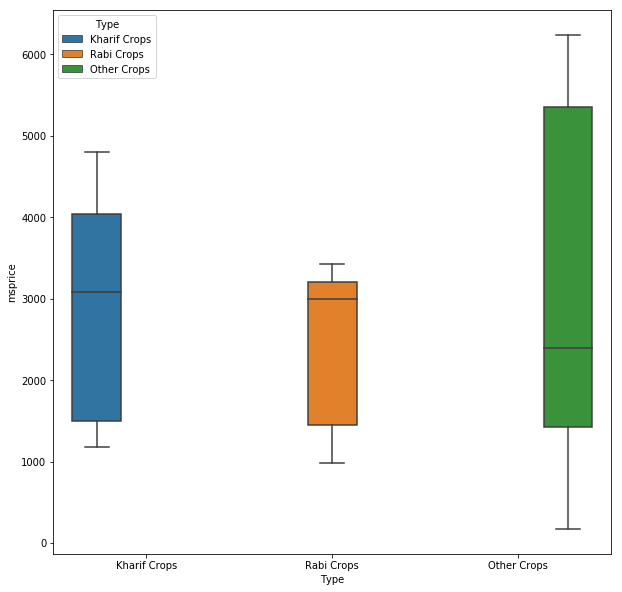

In [11]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(y="msprice", x="Type", data=mandi_data,hue="Type")
plt.savefig('crop_outlier_plot',dpi=300)

# Plotting Outliers
Now to find outliers we can analyse the data commodity wise for crop types(Multivariate outlier detection)

In [12]:
def commodity_outliers(df,types):
    commodities=list(df["commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity] # taking one type of commodity in one iteration
        plt.figure(figsize=(6,4))
        plt.title(commodity+" "+types)
        sns.boxplot(x="commodity", y="msprice",data=data_temp)            

In [ ]:
for types in mandi_data["Type"].unique().tolist():
    df_temp=mandi_data[mandi_data["Type"]==types]
    commodity_outliers(df_temp,types)

# Removing Outliers

Now to remove outliers we can use Tukey's Rule which states that  the outliers are values more than 1.5 times the interquartile range from the quartiles — either below Q1 − 1.5IQR, or above Q3 + 1.5IQR.

This rule doesn't alway work as a datapoint which may seem like an outlier may or may not be due to a faulty reading as the data point may show varaition in the data as a set of unique points so to verify that a datapoint is truly an outlier one can use Cook's distance which is used to measure the influence of a observation on all the fitted values

In [13]:
#find outlier according to the msprice of commodity and remove them\

def remove_outlier(df):
    
    data_main=pd.DataFrame()
    commodities=list(df["commodity"].unique())
    
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            Q1 = data_temp["msprice"].quantile(0.25)
            Q3 = data_temp["msprice"].quantile(0.75)
            IQR = Q3-Q1 #Interquartile range
            data_temp=data_temp[~((data_temp["msprice"] < (Q1 - 1.5 * IQR)) | (data_temp["msprice"] > (Q3 + 1.5 * IQR)))]
            #data_temp=data_temp.loc[(data_temp["msprice"] > (Q1 - 1.5 * IQR)) & (data_temp["msprice"] < (Q3 + 1.5 * IQR))]
            data_temp.sort_values("year",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

In [14]:
df_filtered=pd.DataFrame()
for types in mandi_data["Type"].unique().tolist():
    df_temp=mandi_data[mandi_data["Type"]==types]
    data=remove_outlier(df_temp)
    df_filtered=pd.concat([df_filtered,data])

In [15]:
df_filtered.shape

(146, 5)

Plotting again to check that the outliers are removed or not.

C:\Users\vj0805\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\vj0805\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\vj0805\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\vj0805\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


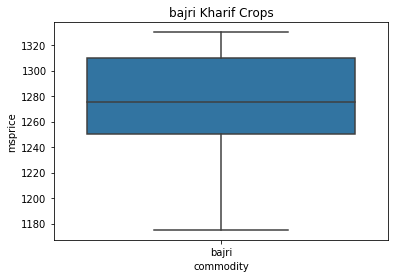

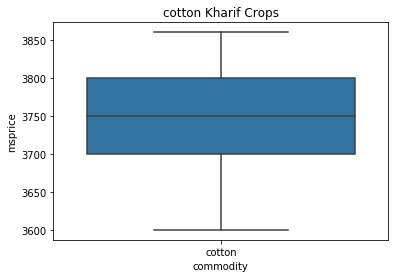

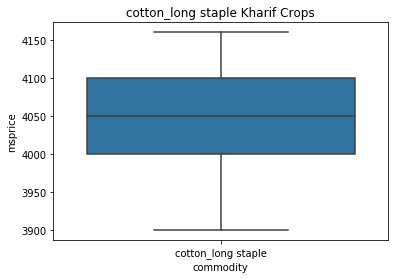

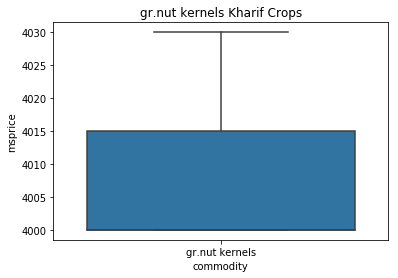

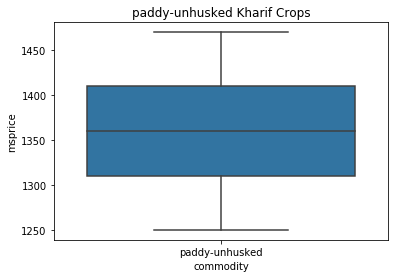

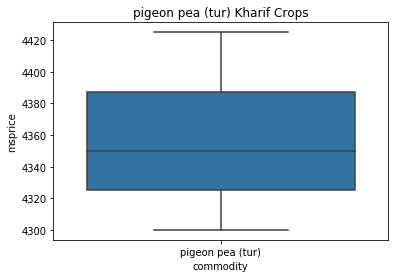

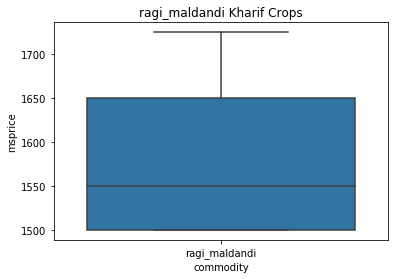

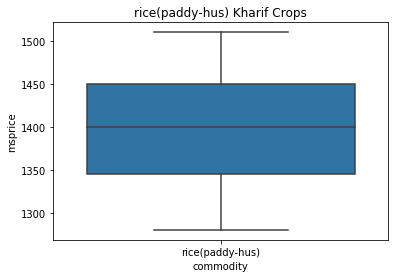

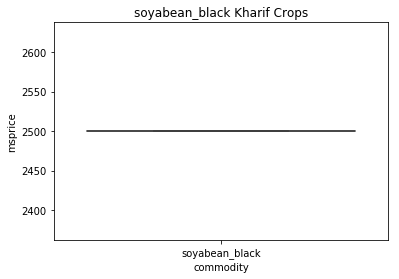

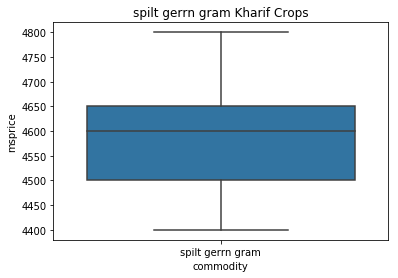

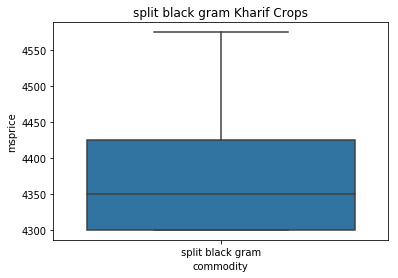

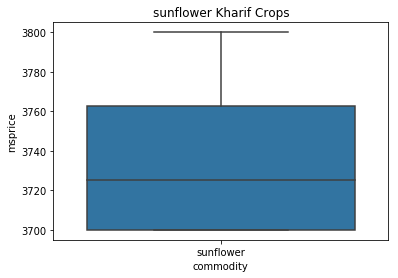

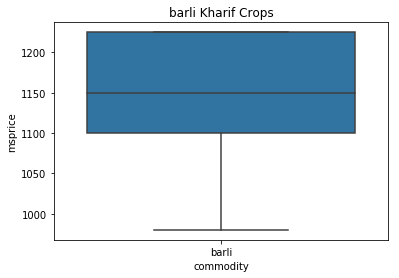

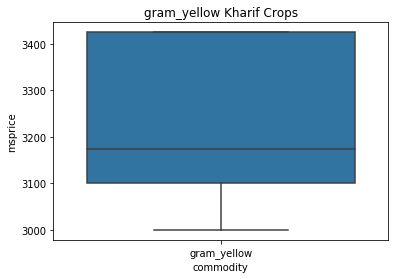

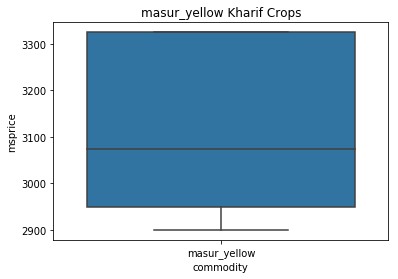

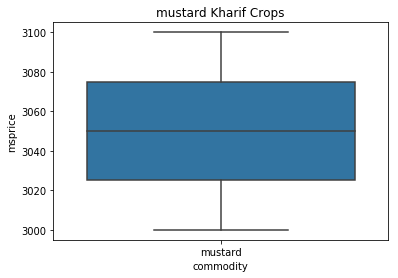

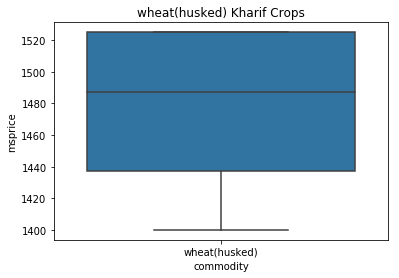

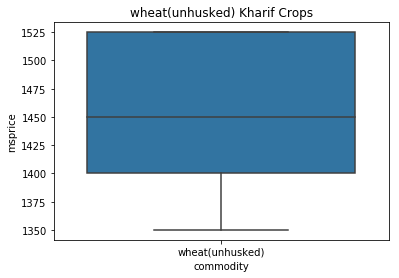

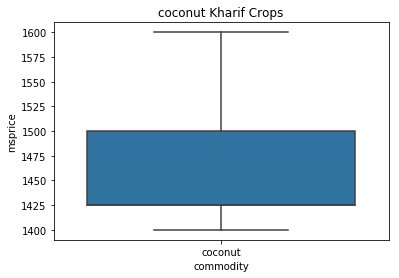

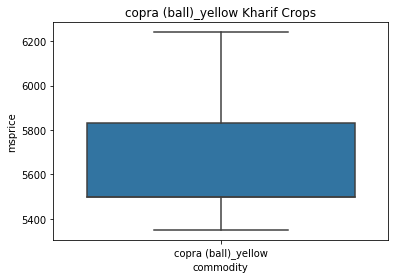

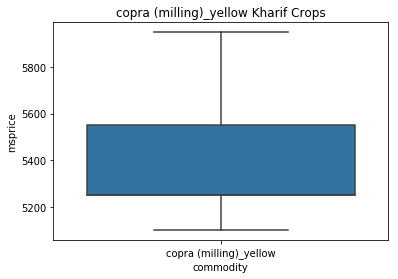

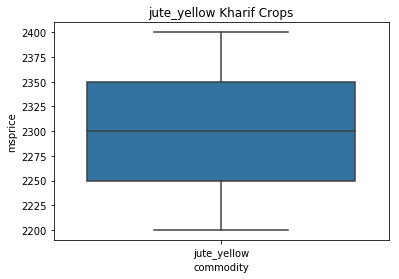

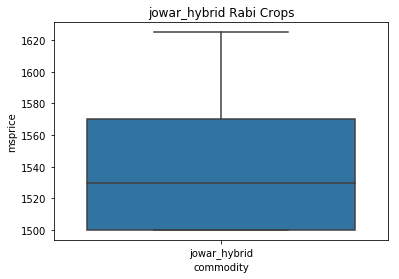

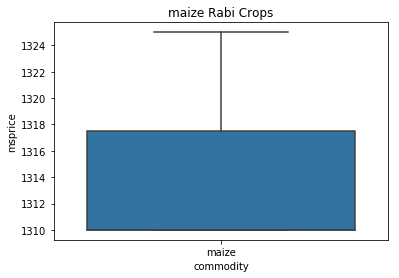

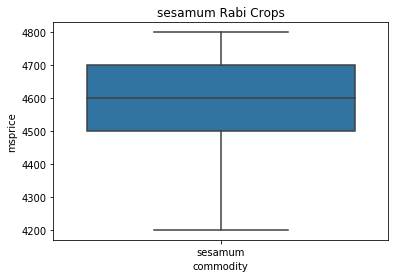

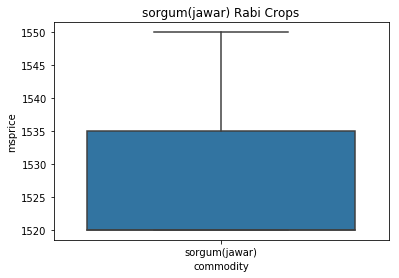

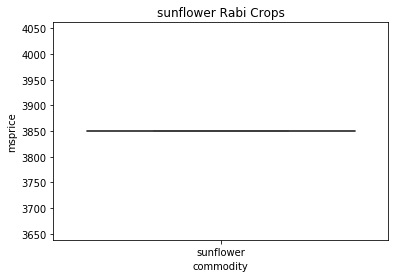

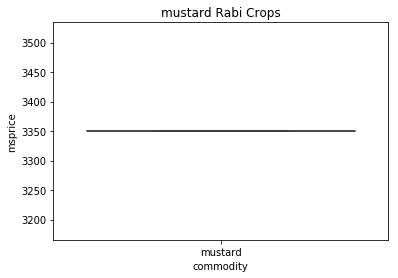

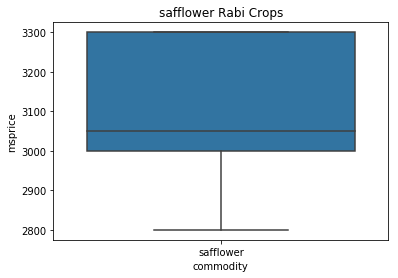

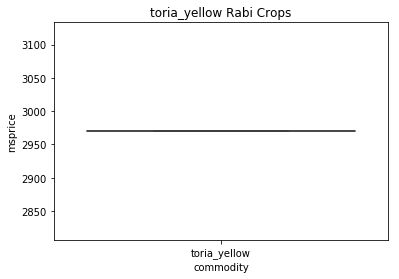

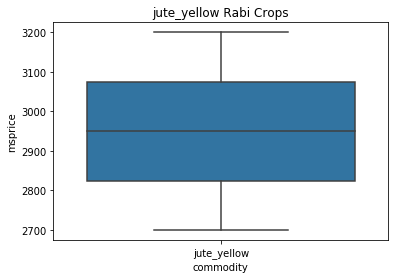

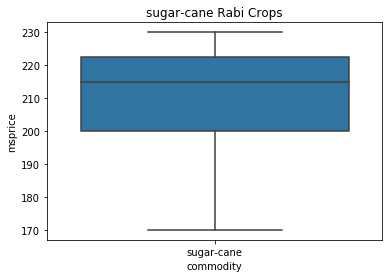

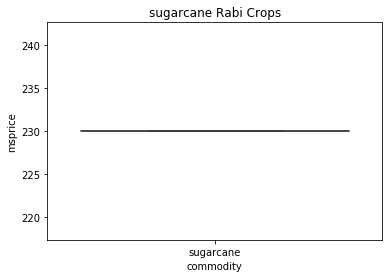

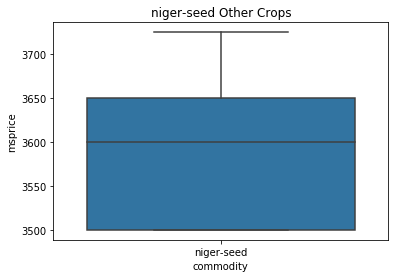

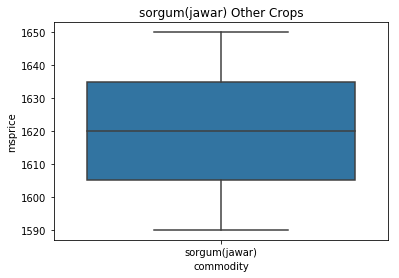

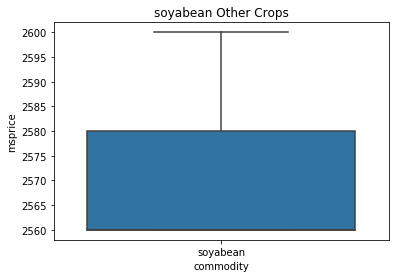

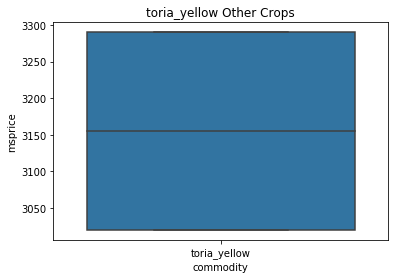

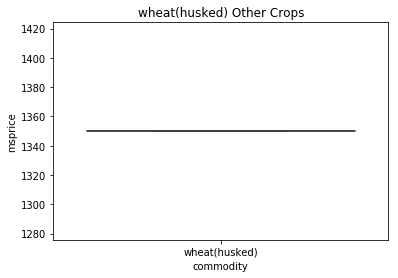

In [16]:
for types in df_filtered["Type"].unique().tolist():
    df_temp=df_filtered[mandi_data["Type"]==types]
    commodity_outliers(df_temp,types)

In [17]:
df_filtered.to_csv("C:\\Users\\vj0805\\Desktop\\Socialcops\\CMO_MSP_Mandi_filtered.csv",index=False)